# Chapter 07 -- Pandas, Part2
 

## Topics Covered

<a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2007%20--%20Pandas%2C%20Part%202.ipynb#SAS-Sort-Merge-with-by-group">SAS Sort Merge with by-group </a>

<a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2007%20--%20Pandas%2C%20Part%202.ipynb#Inner-Join">Inner Join </a>

<a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2007%20--%20Pandas%2C%20Part%202.ipynb#Right-Outer-Join">Right Outer Join </a>

<a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2007%20--%20Pandas%2C%20Part%202.ipynb#Left-Outer-Join">Left Outer Join </a>

<a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2007%20--%20Pandas%2C%20Part%202.ipynb#Full-Outer-Join">Full Outer Join </a>

<a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2007%20--%20Pandas%2C%20Part%202.ipynb#Full-Outer-Join-With-no-Matched-Keys">Full Outer Join with no Matched Keys </a>

<a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2007%20--%20Pandas%2C%20Part%202.ipynb#Group-by:-split-apply-combine">Group by: split-apply-combine</a>
   

The usual pre-amble to get packages loaded into the namespace.

In [2]:
import numpy as np
import pandas as pd
from numpy.random import randn
from pandas import Series, DataFrame, Index
from IPython.display import Image

The display method() defined below is from the Python Data Science Handbook, by Jake VanderPlas, available <a href="http://shop.oreilly.com/product/0636920034919.do"> here </a>.  It is used to render DataFrames side-by-side for comparisons.

In [3]:
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args

    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)

    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

## SAS Sort Merge with by-group

Start with the example data from SAS' Step-by-Step Programming with Base SAS software doc located <a href="https://support.sas.com/documentation/cdl/en/basess/58133/HTML/default/viewer.htm#a001304305.htm"> here</a> .  

Create the SAS data sets left and right.

````
    data left;
       length name $ 32;
       input name $ 1-25 age 27-28 gender $ 30;
       datalines;
    Gunter, Thomas            27 M
    Harbinger, Nicholas       36 M
    Benito, Gisela            32 F
    Rudelich, Herbert         39 M
    Sirignano, Emily          12 F
    Morrison, Michael         32 M
    Morrison, Michael         32 M
    Onieda, Jacqueline        31 F
    ;;;;

    data right;
       length name $ 32;
       input idnumber $ 1-11 name $ 13-40 salary;
       datalines;
    929-75-0218 Gunter, Thomas               27500
    446-93-2122 Harbinger, Nicholas          33900
    228-88-9649 Benito, Gisela               28000
    029-46-9261 Rudelich, Herbert            35000
    442-21-8075 Sirignano, Emily             5000
    321-82-5771 Valpolicella, Vino           88000
    ;;;;
````

The SAS log below shows how both data sets are sorted by 'name' and subsequently merged on this sort key.  If the keys from both tables match, then the observation is merged into a single observation in the output dataset.   

Observations not matching in both input data sets are included and their values are set to missing as illustated in the SAS output below.  This is the equivalent of a full outer join illustrated below.

````
    34       proc sort data=left;
    35          by name;
    36       
    37       proc sort data=right;
    38          by name;
    39       
    40       data merge_both;
    41       merge left
    42             right;
    43          by name;

    NOTE: 8 observations were read from "WORK.left"
    NOTE: 6 observations were read from "WORK.right"
    NOTE: Data set "WORK.merge_both" has 9 observation(s) and 5 variable(s)
````

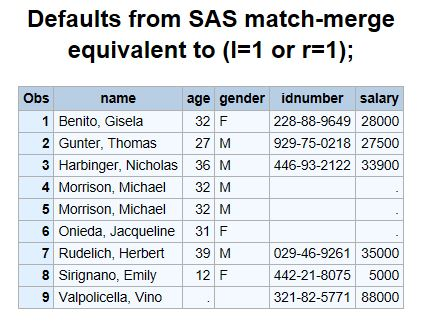

In [99]:
Image(filename='Anaconda3\\output\\default_match_merge.JPG')

The DataFrame 'left' contains demographic information for employees and the 'right' DataFrame contains salary information.  They are replicates of the SAS data sets 'left' and 'right' used with the SAS program above.

In [9]:
left = pd.DataFrame({'name': ['Gunter, Thomas', 'Harbinger, Nicholas', 'Benito, Gisela', 'Rudelich, Herbert', \
                              'Sirignano, Emily', 'Morrison, Michael', 'Morrison, Michael', 'Onieda, Jacqueline'],
                     'age':          [27, 36, 32, 39, 22, 32, 32, 31],
                     'gender':       ['M', 'M', 'F', 'M', 'F', 'M', 'M', 'F']})

right = pd.DataFrame({'name': ['Gunter, Thomas', 'Harbinger, Nicholas', \
                               'Benito, Gisela','Rudelich, Herbert', 'Sirignano, Emily', 'Valpolicella, Vino'],
                      'id':           ['929-75-0218', '446-93-2122', \
                                       '228-88-9649', '029-46-9261', '442-21-8075', '321-82-5771'], 
                      'salary':      [27500, 33900, 28000, 35000, 5000, 80000]})

In [5]:
display("left", "right")

,age,gender,name
0,27,M,"Gunter, Thomas"
1,36,M,"Harbinger, Nicholas"
2,32,F,"Benito, Gisela"
3,39,M,"Rudelich, Herbert"
4,22,F,"Sirignano, Emily"
5,32,M,"Morrison, Michael"
6,32,M,"Morrison, Michael"
7,31,F,"Onieda, Jacqueline"
,id,name,salary
0,929-75-0218,"Gunter, Thomas",27500


pandas use two main constructs for joing and mergeing dataframes.  There is the <a href="http://pandas.pydata.org/pandas-docs/stable/merging.html#merge-join-and-concatenate"> concat </a> function and the Database-style <a href="http://pandas.pydata.org/pandas-docs/stable/merging.html#database-style-dataframe-joining-merging"> join/merge </a> operations with syntax similar to SQL.

The examples below use the Database-style join/merge operations.

Now, consider the SAS log below.  It shows 7 different output data sets to examine how each of them  are produced with panda.  

````
    26      data both
    27           right
    28           left
    29           allrows
    30           nomatchl
    31           nomatchr
    32           nomatch;
    33      
    34            merge left(in=l)
    35                   right(in=r);
    36            by name;
    37      
    38      if (l=l and r=1) then output both; *Inner Join;
    39      
    40      if r = 1 then output right; * Right Outer Join;
    41      
    42      if l = 1 then output left;  * Left Outer Join;
    43      
    44      if (l=1 or r=1) then output allrows; *Full Outer Join;
    45      
    46      if (l=0 and r=1) then output nomatchl;
    47      
    48      if (l=1 and r=0) then output nomatchr;
    49      
    50      if (l=0 or r=0) then output nomatch;

    NOTE: 8 observations were read from "WORK.left"
    NOTE: 6 observations were read from "WORK.right"
    NOTE: Data set "WORK.both" has 6 observation(s) and 5 variable(s)
    NOTE: Data set "WORK.right" has 6 observation(s) and 5 variable(s)
    NOTE: Data set "WORK.left" has 8 observation(s) and 5 variable(s)
    NOTE: Data set "WORK.allrows" has 9 observation(s) and 5 variable(s)
    NOTE: Data set "WORK.nomatchl" has 1 observation(s) and 5 variable(s)
    NOTE: Data set "WORK.nomatchr" has 3 observation(s) and 5 variable(s)
    NOTE: Data set "WORK.nomatch" has 4 observation(s) and 5 variable(s)
````

## Inner Join
### If (L=1 and R=1);

An INNER JOIN selects only those rows whose key values are found in both tables.  Another way to say this is the intersection of key values.

The PROC SQL Inner Join example.
````
    37       proc sql;
    38          select monotonic() as obs
    39                ,*
    40       
    41        from left, right
    42        where left.name = right.name;
````

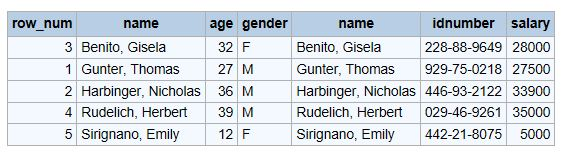

In [7]:
Image(filename='Anaconda3\\output\\inner_join.JPG')

With the panda merge() method, how='inner' is the analog to the SAS example above.

The panda 'how' argument for the merge() method specifies which keys are to be included in the output table. If a key combination does not appear in either the left or right tables, the values in the joined table will be NaN for missing.  This is the same as the SAS sort/merge example above. 

For panda, use the how='inner' argument for an INNER JOIN.  This retrieves the intersection of key values from the 'left' and 'right' DataFrames.

In [36]:
both = pd.merge(left, right, on='name', how='inner', sort=True)

In [37]:
both

,age,gender,name,id,salary
0,32,F,"Benito, Gisela",228-88-9649,28000
1,27,M,"Gunter, Thomas",929-75-0218,27500
2,36,M,"Harbinger, Nicholas",446-93-2122,33900
3,39,M,"Rudelich, Herbert",029-46-9261,35000
4,22,F,"Sirignano, Emily",442-21-8075,5000


The SAS Data Step eqivalent of an Inner Join.
    
    data both;
    merge left(in=l)
          right(in=r);
    by name;
    
    if (l=1 and r=1) then output both;
    

## Right Outer Join
### if R = 1 then output right;

PROC SQL Right Outer Join example.

````
    38       proc sql;
    39       create table r_outer(drop=old_name) as
    40          select monotonic() as row_num
    41                ,coalesce(left.old_name, right.old_name) as name
    42                ,*
    43          from left (rename=(name=old_name))
    44          right join
    45          right (rename=(name=old_name))
    46        on left.old_name = right.old_name;
    47       
    48        select *
    49        from r_outer;
    50        quit;
````

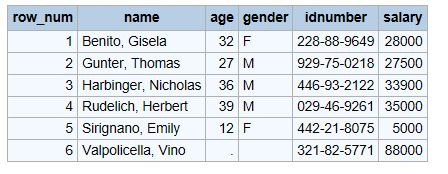

In [23]:
Image(filename='Anaconda3\\output\\right_outer.JPG')

For panda, use the how='right' argument for a RIGHT OUTER JOIN.  This uses only those key values found in the 'right' DataFrame.  

In [38]:
r_outer = pd.merge(left, right, how='right', sort=True)

In [39]:
r_outer

,age,gender,name,id,salary
0,32.0,F,"Benito, Gisela",228-88-9649,28000
1,27.0,M,"Gunter, Thomas",929-75-0218,27500
2,36.0,M,"Harbinger, Nicholas",446-93-2122,33900
3,39.0,M,"Rudelich, Herbert",029-46-9261,35000
4,22.0,F,"Sirignano, Emily",442-21-8075,5000
5,NaN,NaN,"Valpolicella, Vino",321-82-5771,80000


The SAS Data Step equivalent of a Right Outer Join.

````
    78       data r_outer;
    79           merge left(in=l)
    80                 right(in=r);
    81       
    82       if r = 1;
````

## Left Outer Join
### If L = 1 then output left;

PROC SQL Left Outer Join example.  See the SAS SQL Right Outer Join example above to use the COALESCE function to coerce the name column contributed by both both tables into a single column.

````
    29       proc sql;
    30          select monotonic() as row_num
    31                ,*
    32          from
    33             left
    34          left join
    35             right
    36        on left.name = right.name;
    37       
    38        quit;
````

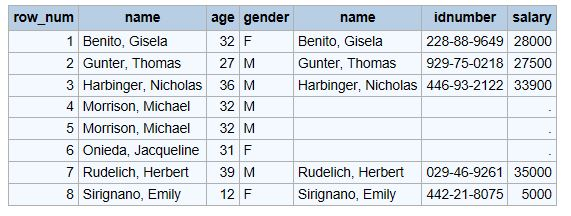

In [25]:
Image(filename='Anaconda3\\output\\left_outer.JPG')

For panda, use the how='left' argument for a LEFT OUTER JOIN.  This uses only those key values found in the left DataFrame.

In [40]:
l_outer = pd.merge(left, right, how='left', sort=True)

In [41]:
l_outer

,age,gender,name,id,salary
0,32,F,"Benito, Gisela",228-88-9649,28000.0
1,27,M,"Gunter, Thomas",929-75-0218,27500.0
2,36,M,"Harbinger, Nicholas",446-93-2122,33900.0
3,32,M,"Morrison, Michael",NaN,NaN
4,32,M,"Morrison, Michael",NaN,NaN
5,31,F,"Onieda, Jacqueline",NaN,NaN
6,39,M,"Rudelich, Herbert",029-46-9261,35000.0
7,22,F,"Sirignano, Emily",442-21-8075,5000.0


## Full Outer Join
### If (L=1 or R=1);

PROC SQL Full Outer Join exanple.
````
    6       proc sql;
    7       create table sas_merge(drop=old_name) as
    8       select monotonic() as obs
    9             ,coalesce(left.old_name, right.old_name) as name
    10             ,*
    11          from left (rename=(name=old_name))
    12       full join right (rename=(name=old_name))
    13           on left.old_name = right.old_name;
    14       
    15       select * from sas_merge;   
````

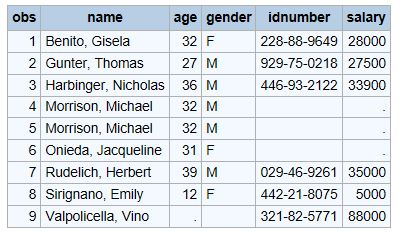

In [3]:
Image(filename='Anaconda3\\output\\full_outer_join.JPG')

In [42]:
merge_both = pd.merge(left, right, on='name', how='outer', sort=True)

In [43]:
merge_both

,age,gender,name,id,salary
0,32.0,F,"Benito, Gisela",228-88-9649,28000.0
1,27.0,M,"Gunter, Thomas",929-75-0218,27500.0
2,36.0,M,"Harbinger, Nicholas",446-93-2122,33900.0
3,32.0,M,"Morrison, Michael",NaN,NaN
4,32.0,M,"Morrison, Michael",NaN,NaN
5,31.0,F,"Onieda, Jacqueline",NaN,NaN
6,39.0,M,"Rudelich, Herbert",029-46-9261,35000.0
7,22.0,F,"Sirignano, Emily",442-21-8075,5000.0
8,NaN,NaN,"Valpolicella, Vino",321-82-5771,80000.0


This is the default behavior for a SAS 'Sort-Merge' with a by-group, except in the case of a many-to-many join (see below).  It combines all observations from both data sets together.  Or said another way, it is the UNION of key values from both tables.  

This is also the equivalent to setting the MERGE in= flag as:

    if (in=l or in=r) then output merge_both;

````
    34       proc sort data=left;
    35          by name;
    36       
    37       proc sort data=right;
    38          by name;
    39       
    40       data merge_both;
    41       merge left
    42             right;
    43          by name;

    NOTE: 8 observations were read from "WORK.left"
    NOTE: 6 observations were read from "WORK.right"
    NOTE: Data set "WORK.merge_both" has 9 observation(s) and 5 variable(s)
````

## Outer Join With no Matched Keys
### if (L=0 or R=0); 

The examples above illustrate various joining strategies based on finding matching key values in the data to be joined.  The next three examples illustrate examples of joining data when keys are not matched.  

Since every SQL join is a sub-set of the Cartesian product join there is no simple way to select records which are found among non-matched amoung keys (of course, WHERE clauses can be applied).  This is where the SAS Data Step with its IN= processing logic is an easy to implement approach.

The next three examples use the panda's indicator= argument to the pd.merge() method as an analog to the IN= flag.  Start with the SAS Data Step for no matched keys in either the 'left' or 'right' data sets. 

````
    45      data nomatch;
    46            merge left(in=l)
    47                   right(in=r);
    48            by name;
    49      
    50      if (l=0 or r=0);
    51      
    52      title1 "if (L=0 or R=0)";
````        

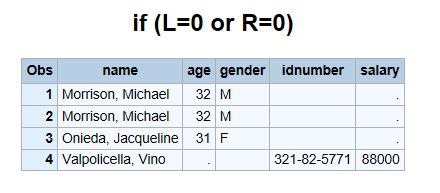

In [46]:
 Image(filename='Anaconda3\\output\\nomatch.JPG')

panda provisions the indicator= argument to the pd.merge() method.  The indicator argument can be a column name which takes on 1 of 3 possible values:

    left_only
    right_only
    both
    
By applying a boolean filter in conjunction with these values, we can replicate the behaviors for the SAS IN= flag for MERGEs.  

In [49]:
nomatch = pd.merge(left, right, on='name', how='outer', sort=True, indicator='in=')

The 'nomatch' DataFrame displays the indicator= column.  Use the nomatch['in='] column for filtering.

In [56]:
nomatch

,age,gender,name,id,salary,in=
0,32.0,F,"Benito, Gisela",228-88-9649,28000.0,both
1,27.0,M,"Gunter, Thomas",929-75-0218,27500.0,both
2,36.0,M,"Harbinger, Nicholas",446-93-2122,33900.0,both
3,32.0,M,"Morrison, Michael",NaN,NaN,left_only
4,32.0,M,"Morrison, Michael",NaN,NaN,left_only
5,31.0,F,"Onieda, Jacqueline",NaN,NaN,left_only
6,39.0,M,"Rudelich, Herbert",029-46-9261,35000.0,both
7,22.0,F,"Sirignano, Emily",442-21-8075,5000.0,both
8,NaN,NaN,"Valpolicella, Vino",321-82-5771,80000.0,right_only


Using <a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2005%20--%20Understanding%20Indexes.ipynb#Mixing-.loc-Indexer-with-Boolean-Operators"> boolean logic</a> and the logical 'or' (|) comparison, select those rows with the value 'left_only' and 'right_only'.

In [52]:
nomatch[(nomatch['in='] == 'left_only') | (nomatch['in='] == 'right_only')]

,age,gender,name,id,salary,in=
3,32.0,M,"Morrison, Michael",NaN,NaN,left_only
4,32.0,M,"Morrison, Michael",NaN,NaN,left_only
5,31.0,F,"Onieda, Jacqueline",NaN,NaN,left_only
8,NaN,NaN,"Valpolicella, Vino",321-82-5771,80000.0,right_only


Of course, if you are into the brievity thing, then use:

In [23]:
nomatch[nomatch["in="] != 'both']

,age,gender,name,id,salary,in=
3,32.0,M,"Morrison, Michael",NaN,NaN,left_only
4,32.0,M,"Morrison, Michael",NaN,NaN,left_only
5,31.0,F,"Onieda, Jacqueline",NaN,NaN,left_only
8,NaN,NaN,"Valpolicella, Vino",321-82-5771,80000.0,right_only


## Outer Join no Matched Keys in Right

Locate the rows in the 'right' data set which have no corresonding match in the 'left' data set.

````     
12      data nomatchr;
13            merge left(in=l)
14                   right(in=r);
15            by name;
16      
17      if (l=0 and r=1);
18      
     
````

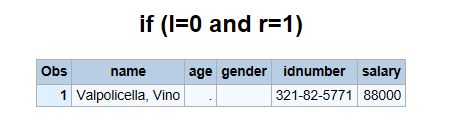

In [80]:
 Image(filename='Anaconda3\\output\\nomatch_in_right.JPG')

Locate the rows in the 'right' DataFrame which have no corresonding match in the 'left' DataFrame.

In [91]:
nomatch_r = pd.merge(left, right, on='name', how='outer', sort=True, indicator='in=')

Start with the results of a full outer join.

In [92]:
nomatch_r

,age,gender,name,id,salary,in=
0,32.0,F,"Benito, Gisela",228-88-9649,28000.0,both
1,27.0,M,"Gunter, Thomas",929-75-0218,27500.0,both
2,36.0,M,"Harbinger, Nicholas",446-93-2122,33900.0,both
3,32.0,M,"Morrison, Michael",NaN,NaN,left_only
4,32.0,M,"Morrison, Michael",NaN,NaN,left_only
5,31.0,F,"Onieda, Jacqueline",NaN,NaN,left_only
6,39.0,M,"Rudelich, Herbert",029-46-9261,35000.0,both
7,22.0,F,"Sirignano, Emily",442-21-8075,5000.0,both
8,NaN,NaN,"Valpolicella, Vino",321-82-5771,80000.0,right_only


Use a boolean comparision to find those rows which are contributed by the 'right' DataFrame only.  In other words, key values in the 'right' DataFrame and not found in the 'left' DataFrame.

In [98]:
nomatch_r[nomatch_r['in='] == 'right_only']

,age,gender,name,id,salary,in=
8,NaN,NaN,"Valpolicella, Vino",321-82-5771,80000.0,right_only


And of course the no matching rows found in the 'right' DataFrame can also be subsetted from the 'nomatch' DataFrame created above as:

In [94]:
nomatch[nomatch['in='] == 'right_only']

,age,gender,name,id,salary,in=
8,NaN,NaN,"Valpolicella, Vino",321-82-5771,80000.0,right_only


## Outer Join no Matched Keys in Left

Locate the rows in the 'left' data set which have no corresonding match in the 'right' data set.

````
    96      data nomatchl;
    97            merge left(in=l)
    98                   right(in=r);
    99            by name;
    100      
    101      if (l=1 and r=0);
    102      
````

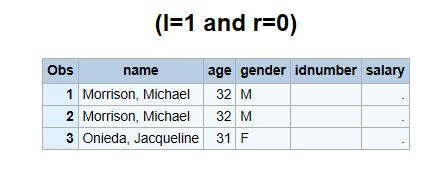

In [89]:
Image(filename='Anaconda3\\output\\nomatch_in_left.JPG')

In [95]:
nomatch_l = pd.merge(left, right, on='name', how='outer', sort=True, indicator='in=')

Start with the results of a full outer join.

In [97]:
nomatch_l

,age,gender,name,id,salary,in=
0,32.0,F,"Benito, Gisela",228-88-9649,28000.0,both
1,27.0,M,"Gunter, Thomas",929-75-0218,27500.0,both
2,36.0,M,"Harbinger, Nicholas",446-93-2122,33900.0,both
3,32.0,M,"Morrison, Michael",NaN,NaN,left_only
4,32.0,M,"Morrison, Michael",NaN,NaN,left_only
5,31.0,F,"Onieda, Jacqueline",NaN,NaN,left_only
6,39.0,M,"Rudelich, Herbert",029-46-9261,35000.0,both
7,22.0,F,"Sirignano, Emily",442-21-8075,5000.0,both
8,NaN,NaN,"Valpolicella, Vino",321-82-5771,80000.0,right_only


Use a boolean comparision to find those rows which are contributed by the 'left' DataFrame only.  In other words, key values in the 'left' DataFrame and not found in the 'right' DataFrame.

In [96]:
nomatch_l[nomatch_l['in='] == 'left_only']

,age,gender,name,id,salary,in=
3,32.0,M,"Morrison, Michael",NaN,NaN,left_only
4,32.0,M,"Morrison, Michael",NaN,NaN,left_only
5,31.0,F,"Onieda, Jacqueline",NaN,NaN,left_only


Filter using the boolean filter for rows contributed by the 'left' DataFrame

## Group by: split-apply-combine

In [24]:
left = pd.DataFrame({'name': ['Gunter, Thomas', 'Harbinger, Nicholas', 'Benito, Gisela', 'Rudelich, Herbert', \
                              'Sirignano, Emily', 'Morrison, Michael', 'Morrison, Michael', 'Onieda, Jacqueline'],
                     'age':          [27, 36, 32, 39, 22, 32, 32, 31],
                     'gender':       ['M', 'M', 'F', 'M', 'F', 'M', 'M', 'F'],
                     'status':       ['Pro', 'Amature', 'Amature', 'Pro', 'Amature', 'Amature', 'Pro', 'Pro']})

right = pd.DataFrame({'name': ['Gunter, Thomas', 'Harbinger, Nicholas', \
                               'Benito, Gisela','Rudelich, Herbert', 'Sirignano, Emily', 'Valpolicella, Vino'],
                      'id':           ['929-75-0218', '446-93-2122', \
                                       '228-88-9649', '029-46-9261', '442-21-8075', '321-82-5771'], 
                      'salary':      [27500, 33900, 28000, 35000, 5000, 80000]})

Group by involves splitting data based on a criteria, creating a sub-population and applying a function to these groups.  Then we often combine these results into a single set of data.  Starting with a SAS-centric view, consider the program below as one such illustration.

To illustrate the capabilities of panda group by we add an additional column on the 'left' DataFrame 'status' which is an additional level we can use.

Execute a FULL OUTER JOIN to merge the 'left' and 'right' DataFrames togther.

In [25]:
df = pd.merge(left, right, on='name', how='outer', sort=True, indicator='in=')

Drop the duplicate values for 'name'.  

In [26]:
df = df.drop_duplicates('name')

In [27]:
df

,age,gender,name,status,id,salary,in=
0,32.0,F,"Benito, Gisela",Amature,228-88-9649,28000.0,both
1,27.0,M,"Gunter, Thomas",Pro,929-75-0218,27500.0,both
2,36.0,M,"Harbinger, Nicholas",Amature,446-93-2122,33900.0,both
3,32.0,M,"Morrison, Michael",Amature,NaN,NaN,left_only
5,31.0,F,"Onieda, Jacqueline",Pro,NaN,NaN,left_only
6,39.0,M,"Rudelich, Herbert",Pro,029-46-9261,35000.0,both
7,22.0,F,"Sirignano, Emily",Amature,442-21-8075,5000.0,both
8,NaN,NaN,"Valpolicella, Vino",NaN,321-82-5771,80000.0,right_only


Before we can utilize the newly created df DataFrame, we need to transform the missing salary information.  The additional .groupby example below displays the mean salary for the two levels of gender.

In [28]:
gb1 = df.groupby('gender')['salary'].mean()
gb1

gender
F    16500.000000
M    32133.333333
Name: salary, dtype: float64

Use PROC SQL to illustrate the same aggregation method (mean) for a group by (gender).  The \_null\_ data step is to print the values to the SAS log.

````
    30       proc sql;
    31          create table sal_by_gender as
    32          select gender, mean(salary) as mean_sal
    33          from left as l,
    34               right as r
    35          where l.name = r.name
    36          group by gender;
    NOTE: Data set "WORK.sal_by_gender" has 2 observation(s) and 2 variable(s)
    37       quit;
    38       
    39       data _null_;
    40          set sal_by_gender;
    41          put _all_;

    _N_=1 _ERROR_=0 gender=F mean_sal=16500
    _N_=2 _ERROR_=0 gender=M mean_sal=32133.333333
````

The next x cells walk through a sequence of steps using the .transform method with the lambda function and .fillna() to replace missing salary values in the DataFrame with the grouped mean. That is, missing values for Females use the mean salary for females; likewise for males. 

Create the DataFrameGroupBy object from the 'gender' column.

In [30]:
gb2 = df.groupby('gender')
type(gb2)

pandas.core.groupby.DataFrameGroupBy

In [29]:
gb1.count()

2

Next, define a function using the lambda function which applies the .fillna() method for replacing missing values.  The arguement to .fillna is the mean() method.  More examples on handling and replacing missing data are located <a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2004%20--%20Pandas%2C%20Part%201.ipynb#Missing-Value-Replacement"> here </a>

In [31]:
func = lambda x: x.fillna(x.mean())
type(func)

function

The function defined above is now used by the groupby.transform() method, in the case below gb2.transform.  gb2 is the 'gender' group.  This is analagous to the GROUP BY in the PROC SQL query above.

In [32]:
trans = gb2.transform(func)
type(trans)

pandas.core.frame.DataFrame

It turns out that with the steps used above, the lambda function used was applied for all ints and floats to replace missing values with their respective group mean.  Therefore we replace the original df DataFrame column 'salary' with the transformed 'salary' column belong to the 'trans' DataFrame.

In [33]:
df["salary"] = trans["salary"]
df["salary"]

0    28000.000000
1    27500.000000
2    33900.000000
3    32133.333333
5    16500.000000
6    35000.000000
7     5000.000000
8    80000.000000
Name: salary, dtype: float64

In [34]:
df

,age,gender,name,status,id,salary,in=
0,32.0,F,"Benito, Gisela",Amature,228-88-9649,28000.000000,both
1,27.0,M,"Gunter, Thomas",Pro,929-75-0218,27500.000000,both
2,36.0,M,"Harbinger, Nicholas",Amature,446-93-2122,33900.000000,both
3,32.0,M,"Morrison, Michael",Amature,NaN,32133.333333,left_only
5,31.0,F,"Onieda, Jacqueline",Pro,NaN,16500.000000,left_only
6,39.0,M,"Rudelich, Herbert",Pro,029-46-9261,35000.000000,both
7,22.0,F,"Sirignano, Emily",Amature,442-21-8075,5000.000000,both
8,NaN,NaN,"Valpolicella, Vino",NaN,321-82-5771,80000.000000,right_only


We can ask for multiple aggregation methods be applied to multiple columns.

In [36]:
gb3 = df.groupby(['gender', 'status'])

In [37]:
gb3['age', 'salary'].agg([np.std, np.mean])

age              salary              
                     std  mean           std          mean
gender status                                             
F      Amature  7.071068  27.0  16263.455967  16500.000000
       Pro           NaN  31.0           NaN  16500.000000
M      Amature  2.828427  34.0   1249.221980  33016.666667
       Pro      8.485281  33.0   5303.300859  31250.000000

## Navigation

<a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/tree/master/"> Return to Chapter List </a>    